<a href="https://colab.research.google.com/github/ittakato/APS360_MBTI/blob/main/APS360_MBTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Preprocessing

In [ ]:
!pip install -U torchtext==0.10.0
import torchtext


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 5.3 MB/s 
     |████████████████████████████████| 831.4 MB 2.5 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.13.1
    Uninstalling torchtext-0.13.1:
      Successfully uninstalled torchtext-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.1+cu113 requires torch==1.12.1, but you have torch 1.9.0 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.9.0 which is incompatible.


In [ ]:
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchtext
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

torch.manual_seed(0);

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda") 
else:
    device = torch.device("cpu")
device

device(type='cpu')

In [ ]:
#START RUNNING FROM THIS CELL
import pandas as pd

In [ ]:
df = pd.read_csv("/content/mbti_1.csv")

ParserError: ignored

In [ ]:
df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [ ]:
# DON'T RUN THIS CELL. RUN THE CELL BELOW INSTEAD.
df = df[:2500] # Only using part of dataframe

df_length = len(df)

for i in range(df_length):
  posts_split = df.iloc[i]['posts'].split('|||')
  cur_type = df.iloc[i]['type']
  for post in posts_split:
    df = df.append({'type': cur_type, 'posts': post}, ignore_index=True)

indices = list(range(df_length))
df = df.drop(df.index[indices])
df = df.reset_index()

df.to_csv('processed_data_split_posts.csv')

In [ ]:
# RUN THIS CELL
df = pd.read_csv("/content/processed_data_split_posts.csv")
df.drop(columns=df.columns[0:2], inplace=True, axis=1)

FileNotFoundError: ignored

In [ ]:
df.tail()

,type,posts
122063,INFJ,"I hang out with mostly guys, and I though I dr..."
122064,INFJ,"Yeah, I do quick, casual touches to people I'm..."
122065,INFJ,"Ahh! I thought I was the only one! I swear, I ..."
122066,INFJ,I've had a Xanga account since middle school. ...
122067,INFJ,"Personal ~ * Name - Corrine, female Locati..."


In [ ]:
# this is the ISTJ separation part
df['I'] = 'NaN'
df['S'] = 'NaN'
df['T'] = 'NaN'
df['J'] = 'NaN'
df = df [['type', 'I', 'S', 'T', 'J', 'posts']]

In [ ]:
for i in range(len(df)):
  if df.iloc[i,0][0] == 'I':
    df.iloc[i,1] = 1    
  else:
    df.iloc[i,1] = 0    # E
  if df.iloc[i,0][1] == 'S':
    df.iloc[i,2] = 1    
  else:
    df.iloc[i,2] = 0    # N
  if df.iloc[i,0][2] == 'T':
    df.iloc[i,3] = 1
  else:   
    df.iloc[i,3] = 0    # F
  if df.iloc[i,0][3] == 'J':
    df.iloc[i,4] = 1
  else:
    df.iloc[i,4] = 0    # P

In [ ]:
import re # import regular expression operations
def remove_urls(post) :
  post = re.sub(r'http\S+', '', str(post), flags=re.MULTILINE)
  return post

def to_lowercase(post) :
  post = post.lower()
  return post

def remove_punc(post) :
  post = re.sub(r"[^\w\d'\s]+", ' ', post)
  post = post.replace("_", '')
  post = re.sub(' +', ' ', post)
  return post

def processed_row(row) :
  processed_row = row
  post = row["posts"]
  post = remove_urls(post)
  post = to_lowercase(post)
  post = remove_punc(post)
  
  processed_row["posts"] = post
  return processed_row

In [ ]:
for index, row in df.iterrows() :
  row = processed_row(row)

In [ ]:
print(df.tail())

        type  I  S  T  J                                              posts
122063  INFJ  1  0  0  1  i hang out with mostly guys and i though i dre...
122064  INFJ  1  0  0  1  yeah i do quick casual touches to people i'm c...
122065  INFJ  1  0  0  1  ahh i thought i was the only one i swear i mad...
122066  INFJ  1  0  0  1  i've had a xanga account since middle school t...
122067  INFJ  1  0  0  1  personal name corrine female location phoenix ...


In [ ]:
df.to_csv("final_processed_data.csv", encoding='utf-8', index=False)

In [ ]:
df_i = df.drop(["S", "T", "J"], axis=1)
df_s = df.drop(["I", "T", "J"], axis=1)
df_t = df.drop(["I", "S", "J"], axis=1)
df_j = df.drop(["I", "S", "T"], axis=1)
df_i.to_csv("final_processed_data_i.csv", encoding='utf-8', index=False)
df_s.to_csv("final_processed_data_s.csv", encoding='utf-8', index=False)
df_t.to_csv("final_processed_data_t.csv", encoding='utf-8', index=False)
df_j.to_csv("final_processed_data_j.csv", encoding='utf-8', index=False)

In [ ]:
df_i.to_csv("final_processed_data_i.csv", encoding='utf-8', index=False)
df_s.to_csv("final_processed_data_s.csv", encoding='utf-8', index=False)
df_t.to_csv("final_processed_data_t.csv", encoding='utf-8', index=False)
df_j.to_csv("final_processed_data_j.csv", encoding='utf-8', index=False)

In [ ]:
#THIS IS THE END OF DATA PROCESSING
#FROM NOW ON, JUST RUN THESE TWO AND THAT IS ENOUGH
df = pd.read_csv("/content/final_processed_data.csv")
df.head()

,type,I,S,T,J,posts
0,INFJ,1,0,0,1,'
1,INFJ,1,0,0,1,NaN
2,INFJ,1,0,0,1,enfp and intj moments sportscenter not top ten...
3,INFJ,1,0,0,1,what has been the most life changing experienc...
4,INFJ,1,0,0,1,on repeat for most of today


In [ ]:
df_i = pd.read_csv("/content/final_processed_data_i.csv")
df_s = pd.read_csv("/content/final_processed_data_s.csv")
df_t = pd.read_csv("/content/final_processed_data_t.csv")
df_j = pd.read_csv("/content/final_processed_data_j.csv")

In [ ]:
# df[df.posts.apply(lambda x: isinstance(x, str))]
df_i.head()

,type,I,posts
2,INFJ,1,enfp and intj moments sportscenter not top ten...
3,INFJ,1,what has been the most life changing experienc...
4,INFJ,1,on repeat for most of today
5,INFJ,1,may the perc experience immerse you
6,INFJ,1,the last thing my infj friend posted on his fa...


In [ ]:
df_i.dropna(inplace=True)
df_i = df_i.astype({'posts':'string'})
print(df_i.dtypes)
df_i = df_i.loc[df_i['posts'].str.len() > 5]

type     object
I         int64
posts    string
dtype: object


### Visualization

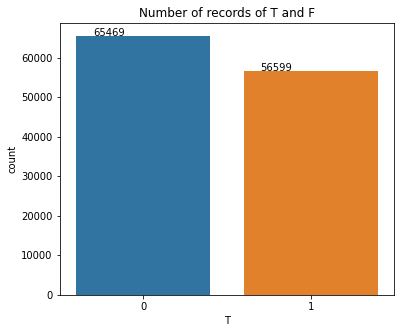

In [ ]:
#Need df with header to run, otherwise it won't work
plt.figure(figsize=(6,5))
plt.title("Number of records of T and F")
plot = sn.countplot(x = "T", data = df_t)
for p in plot.patches :
  plot.annotate(p.get_height(),(p.get_x()+0.1 ,p.get_height()+50))

### Primary Model

In [ ]:
class MBTI_RNN(nn.Module):
  def __init__(self, input_size, hidden_size, num_class):
    super(MBTI_RNN, self).__init__()
    self.emb = nn.Embedding.from_pretrained(glove.vectors)
    self.hidden_size = hidden_size
    self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
    self.fc = nn.Linear(hidden_size, num_class)

  def forward(self, x):
    x = self.emb(x)
    h0 = torch.zeros(1, x.size(0), self.hidden_size)
    out, __ = self.rnn(x, h0)
    return self.fc(out[:,-1,:])

In [ ]:
def split_post_punc(post):
    post = post.replace(".", " . ").replace(",", " , ").replace(";", " ; ").replace("?", " ? ")
    return post.lower().split()

In [ ]:
def get_post_words(glove_vector, feature):
    feature_to_idx = {'I': 1,'S': 2, 'T': 3, 'J': 4}
    train, valid, test = [], [], []
    for i in range(len(df)):
        if i % 29 == 0: # Only using 1/29 of data.
            line = df.iloc[i]
            post = lin      e[-1]
            idxs = [glove_vector.stoi[w]        # lookup the index of word
                    for w in split_post_punc(post)
                    if w in glove_vector.stoi] # keep words that has an embedding
            if not idxs: # ignore posts without any word with an embedding
                continue
            idxs = torch.tensor(idxs) # convert list to pytorch tensor
            label = torch.tensor(line[feature_to_idx[feature]] == 1).long()
            if i % 5 < 3:
                train.append((idxs, label))
            elif i % 5 == 4:
                valid.append((idxs, label))
            else:
                test.append((idxs, label))
    return train, valid, test

In [ ]:
train, valid, test = {}, {}, {}
features = ['I', 'S', 'T', 'J']

for feature in features:
  train[feature], valid[feature], test[feature] = get_post_words(glove, feature)

In [ ]:
for feature in features :
  print(len(train[feature]), len(valid[feature]), len(test[feature]))

2434 811 818
2434 811 818
2434 811 818
2434 811 818


In [ ]:
import random

class PostBatcher:
    def __init__(self, posts, batch_size=8, drop_last=False):
        # store posts by length
        self.posts_by_length = {}

        for words, label in posts:
            # compute the length of the posts
            wlen = words.shape[0]

            # put the post in the correct key inside self.posts_by_length
            if wlen not in self.posts_by_length:
                self.posts_by_length[wlen] = []
            self.posts_by_length[wlen].append((words, label))
         
        #  create a DataLoader for each set of posts of the same length
        self.loaders = {wlen : torch.utils.data.DataLoader(
                                    posts,
                                    batch_size=batch_size,
                                    shuffle=True,
                                    drop_last=drop_last) # omit last batch if smaller than batch_size
            for wlen, posts in self.posts_by_length.items()}
        
    def __iter__(self): # called by Python to create an iterator
        # make an iterator for every post length
        iters = [iter(loader) for loader in self.loaders.values()] # Getting iterator of loader and putting them into a list
        while iters:
            # pick an iterator (a length)
            im = random.choice(iters)
            try:
                yield next(im)
            except StopIteration:
                # no more elements in the iterator, remove it
                iters.remove(im)

In [ ]:
def get_accuracy(model, data_loader):
    correct, total = 0, 0
    for posts, labels in data_loader:
        output = model(posts)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += labels.shape[0]
    return correct / total

In [ ]:
from torchtext.legacy.data import Field, Dataset, Example
from torchtext.legacy import data

In [ ]:
LABEL_I = data.LabelField()
LABEL_S = data.LabelField()
LABEL_T = data.LabelField()
LABEL_J = data.LabelField()
POST = data.Field(tokenize="spacy", tokenizer_language="en_core_web_sm", lower=True)
fields = [("Type", None), ('I', LABEL_I), ('S', LABEL_S), ('T', LABEL_T), ('J', LABEL_J), ('post', POST)]
ds = data.dataset.TabularDataset(
        path = "final_processed_data.csv", 
        format = "CSV", 
        fields = fields,
        skip_header = False)

train, val, test = ds.split(split_ratio=[0.6,0.2,0.2])
print("Length of train dataset:",len(train))
print("Length of val dataset:",len(val))
print("Length of test dataset:",len(test))

Length of train dataset: 73241
Length of val dataset: 24414
Length of test dataset: 24414


In [ ]:
#One hot encoding
POST.build_vocab(train)
print("Number of words:", len(POST.vocab))
LABEL_I.build_vocab(train)
LABEL_S.build_vocab(train)
LABEL_T.build_vocab(train)
LABEL_J.build_vocab(train)
print("Most common words:", POST.vocab.freqs.most_common(5))

Number of words: 2
Most common words: []


In [ ]:
df_i.head()

,type,I,posts
2,INFJ,1,enfp and intj moments sportscenter not top ten...
3,INFJ,1,what has been the most life changing experienc...
4,INFJ,1,on repeat for most of today
5,INFJ,1,may the perc experience immerse you
6,INFJ,1,the last thing my infj friend posted on his fa...


In [ ]:
df_i_new.to_csv("new_new_final_processed_data_i.csv")

In [ ]:
df_i["i_category"] = df['I'].astype('category')
df_i["i"] = df_i["i_category"].cat.codes
df_i.head()

,type,I,posts,i_category,i
2,INFJ,1,enfp and intj moments sportscenter not top ten...,1,1
3,INFJ,1,what has been the most life changing experienc...,1,1
4,INFJ,1,on repeat for most of today,1,1
5,INFJ,1,may the perc experience immerse you,1,1
6,INFJ,1,the last thing my infj friend posted on his fa...,1,1


In [ ]:
df_i_new = pd.read_csv("new_final_processed_data_i.csv")
# df_i_new.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
df_i_new.head()

,Unnamed: 0,type,I,posts,i_category,i
0,2,INFJ,1,enfp and intj moments sportscenter not top ten...,1,1
1,3,INFJ,1,what has been the most life changing experienc...,1,1
2,4,INFJ,1,on repeat for most of today,1,1
3,5,INFJ,1,may the perc experience immerse you,1,1
4,6,INFJ,1,the last thing my infj friend posted on his fa...,1,1


In [ ]:
LABEL_I = data.LabelField()
POST = data.Field(tokenize="spacy", tokenizer_language="en_core_web_sm", lower=True)
fields = [("Unnamed: 0", None), ("Type", None), ('I', LABEL_I), ('post', POST)]
print(fields)
ds = data.dataset.TabularDataset(
        path = "new_final_processed_data_i.csv", 
        format = "CSV", 
        fields = fields,
        skip_header = True)

(train, val, test) = ds.split(split_ratio=[0.6,0.2,0.2], stratified=True, strata_field="I")
print("Length of train dataset:",len(train))
print("Length of val dataset:",len(val))
print("Length of test dataset:",len(test))

[('Unnamed: 0', None), ('Type', None), ('I', <torchtext.legacy.data.field.LabelField object at 0x7fac306cdb50>), ('post', <torchtext.legacy.data.field.Field object at 0x7fac306cdb10>)]
Length of train dataset: 70252
Length of val dataset: 23416
Length of test dataset: 23418


In [ ]:
#One hot encoding
vocab_size = 50000
POST.build_vocab(train, max_size=vocab_size)
print("Number of words:", len(POST.vocab))
LABEL_I.build_vocab(train)
print("Most common words:", POST.vocab.freqs.most_common(5))
print("Number of categories:", len(LABEL_I.vocab))

Number of words: 44446
Most common words: [('i', 110311), ('the', 53890), ('to', 52879), ('and', 42439), ('a', 42420)]
Number of categories: 2


In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, hidden_size, embedding_dim, vocab_size):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.encoder = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=1)
        self.predictor = nn.Linear(hidden_size, 2)
        pass
    
    def forward(self, seq):
        output, (hidden,_) = self.encoder(self.embedding(seq))
        preds = self.predictor(hidden.squeeze(0))
        return preds
        pass

In [ ]:
train_loader, val_loader, test_loader = data.BucketIterator.splits(
    (train, val, test),
    batch_size = 256,
    device = device,
    sort_key = lambda x: len(x.post),
    sort_within_batch = False)

In [ ]:
import time 
def train_rnn_network_all(model, train_loader, val_loader, num_epochs=10, learning_rate=1e-5) :
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
  training_loss_i_list, training_loss_s_list, training_loss_t_list, training_loss_j_list = [], [], [], []
  val_loss_i_list, val_loss_s_list, val_loss_t_list, val_loss_j_list = [], [], [], []
  for epoch in range(num_epochs) :
    start_time = time.time()
    training_loss_i = 0.0
    training_loss_s = 0.0
    training_loss_t = 0.0
    training_loss_j = 0.0
    val_loss_i = 0.0
    val_loss_s = 0.0
    val_loss_t = 0.0
    val_loss_j = 0.0
    for batch_id, batch in enumerate(train_loader) :
      post = batch.post 
      mbti_i = batch.I
      mbti_s = batch.S
      mbti_t = batch.T
      mbti_j = batch.T
      optimizer.zero_grad()
      pred = model(post)
      loss_i = criterion(pred, mbti_i)
      loss_s = criterion(pred, mbti_s)
      loss_t = criterion(pred, mbti_t)
      loss_j = criterion(pred, mbti_j)
      loss_i.backward(retain_graph=True)
      loss_s.backward(retain_graph=True)
      loss_t.backward(retain_graph=True)
      loss_j.backward(retain_graph=True)
      optimizer.step()
      training_loss_i += loss_i.data.item() * post.size(0)
      training_loss_s += loss_s.data.item() * post.size(0)
      training_loss_t += loss_t.data.item() * post.size(0)
      training_loss_j += loss_j.data.item() * post.size(0)
    training_loss_i /= len(train_loader)
    training_loss_s /= len(train_loader)
    training_loss_t /= len(train_loader)
    training_loss_j /= len(train_loader)
    model.eval()

    for batch_id, batch in enumerate(val_loader) :
      post = batch.post 
      mbti_i = batch.I
      mbti_s = batch.S
      mbti_t = batch.T
      mbti_j = batch.T
      pred = model(post)
      loss_i = criterion(pred, mbti_i)
      loss_s = criterion(pred, mbti_s)
      loss_t = criterion(pred, mbti_t)
      loss_j = criterion(pred, mbti_j)
      val_loss_i += loss_i.data.item() * post.size(0)
      val_loss_s += loss_s.data.item() * post.size(0)
      val_loss_t += loss_t.data.item() * post.size(0)
      val_loss_j += loss_j.data.item() * post.size(0)
    val_loss_i /= len(val_loader)
    val_loss_s /= len(val_loader)
    val_loss_t /= len(val_loader)
    val_loss_j /= len(val_loader)
    
    print(("Epoch {}: Train_i loss: {}, Train_s loss: {}, Train_t loss: {}, Train_j loss: {} " +
               "Val_i loss: {}, Val_s loss: {}, Val_t loss: {}, Val_j loss: {}").format(
                   epoch + 1,
                   training_loss_i,
                   training_loss_s,
                   training_loss_t,
                   training_loss_j,
                   val_loss_i,
                   val_loss_s,
                   val_loss_t,
                   val_loss_j,
                   ))

In [ ]:
def get_accuracy_single(model, data_loader) :
  correct, total = 0,0
  for batch_id, batch in enumerate(data_loader) :
    post = batch.post
    mbti_i = batch.I
    output = model(post)
    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(mbti_i.view_as(pred)).sum().item()
    total += mbti_i.shape[0]
  return correct / total

In [ ]:
import time 
import matplotlib.pyplot as plt
def train_rnn_network_single(model, train_loader, val_loader, num_epochs=10, learning_rate=1e-5) :
  torch.manual_seed(1000)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
  training_loss_list = []
  val_loss_list = []
  training_acc_list = []
  val_acc_list = []
  for epoch in range(num_epochs) :
    print("Starting epoch #", epoch+1)
    start_time_epoch = time.time()
    training_loss = 0.0
    val_loss = 0.0
    iteration_no = 0
    for batch_id, batch in enumerate(train_loader) :
      iteration_no += 1
      # faulty_value = False
      post = batch.post 
      mbti_i = batch.I
      # for value in mbti_i :
      #   if value.item() != 0 and value.item() != 1 :
      #     faulty_value = True
      #     break
      # if faulty_value == True :
      #   continue
      optimizer.zero_grad()
      pred = model(post)
      loss = criterion(pred, mbti_i)
      loss.backward(retain_graph=True)
      optimizer.step()
      training_loss += loss.data.item() * post.size(0)
    training_loss /= len(train_loader)
    training_loss_list.append(training_loss)
    training_acc_list.append(get_accuracy_single(model, train_loader))
    model.eval()

    for batch_id, batch in enumerate(val_loader) :
      post = batch.post 
      mbti_i = batch.I
      pred = model(post)
      loss = criterion(pred, mbti_i)
      val_loss += loss.data.item() * post.size(0)
    val_loss /= len(val_loader)
    val_loss_list.append(val_loss)
    val_acc_list.append(get_accuracy_single(model, val_loader))
    
    end_time_epoch = time.time()
    print(("Epoch {}: Train_i loss: {}, Train_i acc: {}, " +
               "Val_i loss: {}, Val_i acc: {}, Time: {}").format(
                   epoch + 1,
                   training_loss,
                   training_acc_list[-1],
                   val_loss,
                   val_acc_list[-1],
                   end_time_epoch - start_time_epoch
                   ))
  plt.title("Losses")
  plt.plot(training_loss_list, label="train_loss")
  plt.plot(val_loss_list, label="val_loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend(loc="best")
  plt.show()

  plt.title("Accuracy")
  plt.plot(training_acc_list, label="train_acc")
  plt.plot(val_acc_list, label="val_acc")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend(loc="best")
  plt.show()

In [ ]:
lstm_1 = LSTMModel(hidden_size=100, embedding_dim=300, vocab_size=vocab_size)
lstm_1.to(device)

LSTMModel(
  (embedding): Embedding(50000, 300)
  (encoder): LSTM(300, 100)
  (predictor): Linear(in_features=100, out_features=2, bias=True)
)

In [ ]:
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(lstm_1.parameters(), lr=1e-5)
# for batch_id, batch in enumerate(train_loader) :
#   faulty_value = False
#   post = batch.post
#   mbti_i = batch.I
#   for thing in mbti_i :
#     if thing.item() != 0 and thing.item() != 1 :
#       print(thing.item())
#       faulty_value = True
#       break
#   if faulty_value == True :
#     continue
#   optimizer.zero_grad() #clear gradients
#   pred = lstm_1(post)
#   loss = criterion(pred, mbti_i)



2


Starting epoch # 1
Epoch 1: Train_i loss: 26.252849920554596, Train_i acc: 0.7588538404600581, Val_i loss: 18.236879809719063, Val_i acc: 0.6456696276050564, Time: 184.8785045146942
Starting epoch # 2
Epoch 2: Train_i loss: 25.833388743400572, Train_i acc: 0.7591100609235324, Val_i loss: 18.116471615174543, Val_i acc: 0.6549795011957635, Time: 181.24661684036255
Starting epoch # 3
Epoch 3: Train_i loss: 25.84255947774107, Train_i acc: 0.7590531230427604, Val_i loss: 18.06089464251114, Val_i acc: 0.6628373761530577, Time: 176.33395147323608
Starting epoch # 4
Epoch 4: Train_i loss: 25.80605654467236, Train_i acc: 0.7594089847975858, Val_i loss: 17.929137054020945, Val_i acc: 0.670097369320123, Time: 174.50157976150513
Starting epoch # 5
Epoch 5: Train_i loss: 25.8058122000911, Train_i acc: 0.759551329499516, Val_i loss: 17.824361713036247, Val_i acc: 0.676289716433208, Time: 190.69156980514526
Starting epoch # 6
Epoch 6: Train_i loss: 25.808363238031212, Train_i acc: 0.7595797984399021,

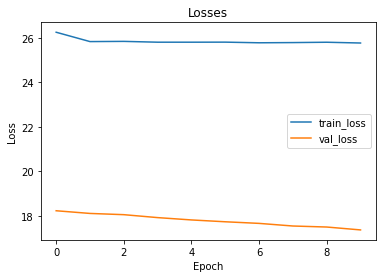

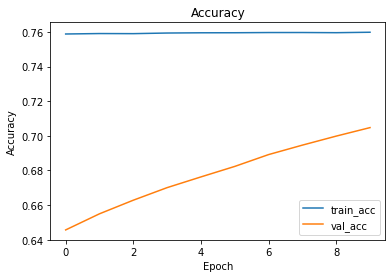

In [ ]:
train_rnn_network_single(lstm_1, train_loader, val_loader)

In [ ]:
test_acc = get_accuracy_single(lstm_1, test_loader)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.6861815697326843


In [ ]:
import time
def train_rnn_network(model, train, valid, num_epochs=5, learning_rate=1e-5):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    losses, train_acc, valid_acc = [], [], []
    epochs = []
    total_start_time = time.time()
    for epoch in range(num_epochs):
        epoch_start_time = time.time()
        for posts, labels in train:
            optimizer.zero_grad()
            print(posts)
            torch.tensor(train).to(torch.int64)
            pred = model(posts)
            loss = criterion(pred, labels)
            loss.backward()
            optimizer.step()
        losses.append(float(loss))

        epochs.append(epoch)
        train_acc.append(get_accuracy(model, train_loader))
        valid_acc.append(get_accuracy(model, valid_loader))

        epoch_end_time = time.time()
        print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f  [%f s]" % (
              epoch+1, loss, train_acc[-1], valid_acc[-1], epoch_end_time - epoch_start_time))
        
    total_end_time = time.time()
    print("Total time taken:", total_end_time - total_start_time)
    # plotting
    plt.title("Training Curve")
    plt.plot(losses, label="Train")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

In [ ]:
models = {}

for feature in features:
  models[feature] = MBTI_RNN(50, 50, 2)
  train_loader = PostBatcher(train[feature], drop_last=True)
  valid_loader = PostBatcher(valid[feature], drop_last=True)
  train_rnn_network(models[feature], train_loader, valid_loader, num_epochs=20, learning_rate=2e-4)
  test_loader = PostBatcher(test[feature], drop_last=True)
  get_accuracy(models[feature], test_loader)

tensor([[ 6.9872e+00,  4.6947e-02, -8.3909e-01, -6.8809e+00,  1.3470e+01,
          4.7514e+00, -1.0213e+01,  4.7554e-01, -5.9182e+00,  2.5708e-01,
         -2.1080e+00,  4.9979e+00, -1.4436e+01, -3.2947e+00,  1.4387e+01,
          9.4158e+00,  2.9626e+00, -3.1007e-01, -4.7478e+00, -1.4035e+01,
         -4.7855e-01,  8.1401e+00,  7.5582e+00, -6.4734e-01,  9.3562e+00,
         -5.5092e+01, -1.3058e+01,  7.4398e+00,  1.0719e+01, -1.2014e+01,
          9.4595e+01,  5.3144e+00, -1.0077e+01, -9.3690e+00, -3.9343e+00,
         -4.4342e+00,  1.9475e+00,  4.3281e+00,  9.1154e-01, -6.4024e+00,
         -4.1432e+00,  1.3168e+00, -2.5038e+00,  9.6003e+00, -2.9440e+00,
          2.1393e+00, -5.0181e+00,  6.1427e-01, -2.2495e+00, -5.7065e-01],
        [ 6.1026e+00,  7.5341e+00, -3.2723e+00, -4.8527e+00,  1.3644e+01,
          6.8615e+00, -1.2324e+01, -4.1955e+00, -5.2547e+00,  3.6178e+00,
         -3.3282e+00,  9.3943e+00, -1.2248e+01, -3.1633e-01,  1.6634e+01,
          5.6004e+00,  9.1109e+00,  4

RuntimeError: ignored

### Baseline Model

In [ ]:
import torch
import torchtext
dimension=50

In [ ]:
glove = torchtext.vocab.GloVe(name='6B', dim=dimension)

.vector_cache/glove.6B.zip: 862MB [02:39, 5.40MB/s]                           
100%|█████████▉| 399999/400000 [00:10<00:00, 37445.50it/s]


In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
features = ['I', 'S', 'T', 'J']

for feature in features:
  for i in range(len(train[feature])):
    temp = torch.zeros(50)
    for j in range(len(train[feature][i][0])):
      temp += glove[glove.itos[train[feature][i][0][j]]]
    train[feature][i] = (temp.numpy(), train[feature][i][1].item())

for feature in features:
  for i in range(len(valid[feature])):
    temp = torch.zeros(50)
    for j in range(len(valid[feature][i][0])):
      temp += glove[glove.itos[valid[feature][i][0][j]]]
    valid[feature][i] = (temp.numpy(), valid[feature][i][1].item())

for feature in features:
  for i in range(len(test[feature])):
    temp = torch.zeros(50)
    for j in range(len(test[feature][i][0])):
      temp += glove[glove.itos[test[feature][i][0][j]]]
    test[feature][i] = (temp.numpy(), test[feature][i][1].item())

In [ ]:
X, y = {}, {}
for feature in features:
  for i in range(len(train[feature])):
    if feature not in X:
      X[feature] = []
    if feature not in y:
      y[feature] = []
    X[feature].append(train[feature][i][0])
    y[feature].append(train[feature][i][1])

for feature in features:
  for i in range(len(valid[feature])):
    if feature not in X:
      X[feature] = []
    if feature not in y:
      y[feature] = []
    X[feature].append(valid[feature][i][0])
    y[feature].append(valid[feature][i][1])

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
# Grid Search for hyperparameter
param_grid = {
    'C': [0.01, 1, 100], 
    'kernel': ['linear', 'rbf']
}

grids = {}

In [ ]:


for feature in features:
  grids[feature] = GridSearchCV(SVC(), param_grid)

  grids[feature].fit(X[feature],y[feature])

  print(f'Best accuracy [{feature}]: ', grids[feature].best_score_)
  print(f'Best hyperparameters [{feature}]: ', grids[feature].best_params_)
  print()

In [ ]:
feature = 'J'

grids[feature] = GridSearchCV(SVC(), param_grid)

grids[feature].fit(X[feature],y[feature])

print(f'Best accuracy [{feature}]: ', grids[feature].best_score_)
print(f'Best hyperparameters [{feature}]: ', grids[feature].best_params_)
print()

# Demonstration

In [ ]:
def demoPost(model, post) :
  categories = {0: "Extroverted", 1: "Introverted"}
  proc = POST.process([POST.preprocess(post)])
  proc = proc.to(device)

  model.eval()
  pred = model(proc)
  print("Prediction:", pred)
  pred_category = categories[pred.argmax().item()] 
  return pred_category

In [ ]:
msg = "Highly esteemed Mrs. Curie, Do not laugh at me for writing you without having anything sensible to say. But I am so enraged by the base manner in which the public is presently daring to concern itself with you that I absolutely must give vent to this feeling."
demoPost(lstm_1, msg)

Prediction: tensor([[ 0.0495, -0.0659]], grad_fn=<AddmmBackward>)


'Extroverted'